In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [7]:
bmi = df['bmi']
diabetes = df['target']
(bmi.shape, diabetes.shape)

((442,), (442,))

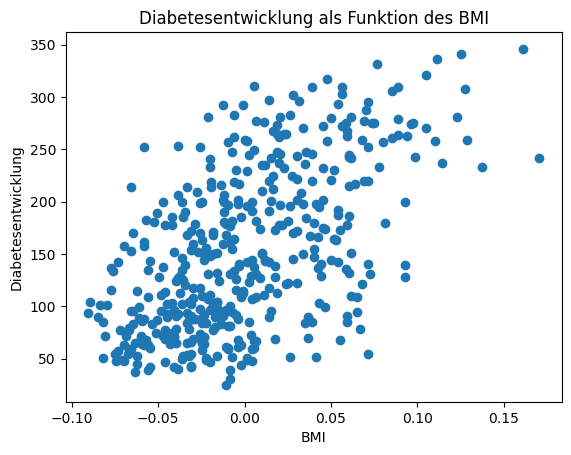

In [9]:
plt.scatter(bmi,diabetes)
plt.xlabel('BMI')
plt.ylabel('Diabetesentwicklung')
plt.title('Diabetesentwicklung als Funktion des BMI')
plt.show()

In [10]:
def update(x, y, w1, w0, alpha):
    dJdw1 = 0
    dJdw0 = 0
    N = len(x)
    for i in range(N):
        dJdw1 += -2 * x[i] * (y[i] - (w1 * x[i] + w0))
        dJdw0 += -2 * (y[i] - (w1 * x[i] + w0))
    w1 = w1 - (1/float(N)) * dJdw1 * alpha
    w0 = w0 - (1/float(N)) * dJdw0 * alpha
    return w1, w0

In [11]:
def train(x, y, w1, w0, alpha, epochs):
    history = []
    for e in range(epochs):
        l = loss(x, y, w1, w0)
        history.append((l, w1, w0))
        if e % 100 == 0:
            print(f"Epoche: {e:4}  Loss: {l:7.3f} w1={w1:.3f} w0={w0:.3f}")
        w1, w0 = update(x, y, w1, w0, alpha)
    return history

In [12]:
def loss(x, y, w1, w0):
    N = len(x)
    error = 0
    for i in range(N):
        error += (y[i] - (w1 * x[i] + w0))**2
    return error / float(N)

In [13]:
history = train(bmi, diabetes, 0, 0, 0.7, 3000)

Epoche:    0  Loss: 29074.482 w1=0.000 w0=0.000
Epoche:  100  Loss: 4971.774 w1=258.102 w0=152.133
Epoche:  200  Loss: 4463.778 w1=446.039 w0=152.133
Epoche:  300  Loss: 4194.435 w1=582.886 w0=152.133
Epoche:  400  Loss: 4051.628 w1=682.531 w0=152.133
Epoche:  500  Loss: 3975.910 w1=755.089 w0=152.133
Epoche:  600  Loss: 3935.765 w1=807.921 w0=152.133
Epoche:  700  Loss: 3914.479 w1=846.391 w0=152.133
Epoche:  800  Loss: 3903.194 w1=874.404 w0=152.133
Epoche:  900  Loss: 3897.210 w1=894.801 w0=152.133
Epoche: 1000  Loss: 3894.037 w1=909.653 w0=152.133
Epoche: 1100  Loss: 3892.355 w1=920.468 w0=152.133
Epoche: 1200  Loss: 3891.463 w1=928.342 w0=152.133
Epoche: 1300  Loss: 3890.990 w1=934.077 w0=152.133
Epoche: 1400  Loss: 3890.740 w1=938.252 w0=152.133
Epoche: 1500  Loss: 3890.607 w1=941.292 w0=152.133
Epoche: 1600  Loss: 3890.536 w1=943.506 w0=152.133
Epoche: 1700  Loss: 3890.499 w1=945.118 w0=152.133
Epoche: 1800  Loss: 3890.479 w1=946.291 w0=152.133
Epoche: 1900  Loss: 3890.468 w1=94

In [14]:
history[:5]

[(29074.481900452487, 0, 0),
 (9620.121422786398, 3.007261005741252, 212.9868778280543),
 (6496.670174498276, 6.004996750378412, 127.79212669683268),
 (5986.232417199526, 8.993237404421668, 161.87002714932123),
 (5893.944402570583, 11.972013042818649, 148.2388669683258)]

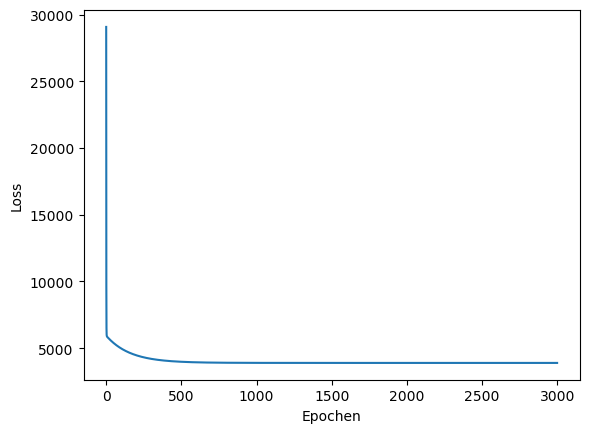

In [15]:
losses = [x[0] for x in history]
plt.plot(range(len(losses)), losses, label='Loss-Entwiclung')
plt.ylabel("Loss")
plt.xlabel("Epochen")
plt.show()

In [16]:
last = history[len(history)-1]
w1opt = last[1]
w0opt = last[2]
print(f'w1 = {w1opt:.3f} w0 = {w0opt:.3f}')

w1 = 949.365 w0 = 152.133


In [17]:
def predict(x, w1, w0):
    return w1*x + w0

In [18]:
predict(0.1, w1opt, w0opt)

247.07000350118608

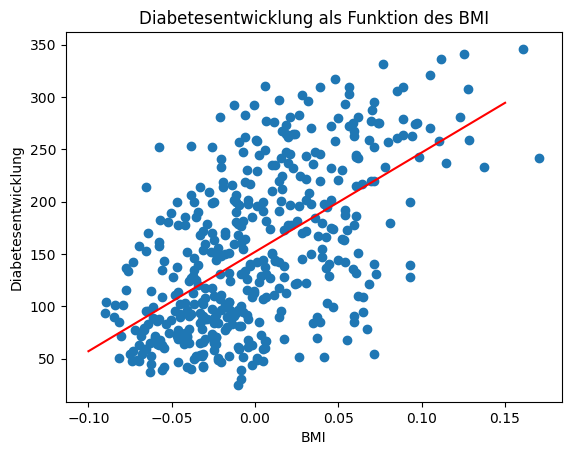

In [19]:
def plot_scatter_regress(w1, w0, title):
    plt.scatter(bmi, diabetes)
    plt.plot([-0.1, 0.15], [predict(-0.1, w1, w0), predict(0.15, w1, w0)], 'r-')
    plt.xlabel('BMI')
    plt.ylabel('Diabetesentwicklung')
    plt.title(title)
    plt.show()
plot_scatter_regress(w1opt, w0opt, 'Diabetesentwicklung als Funktion des BMI')

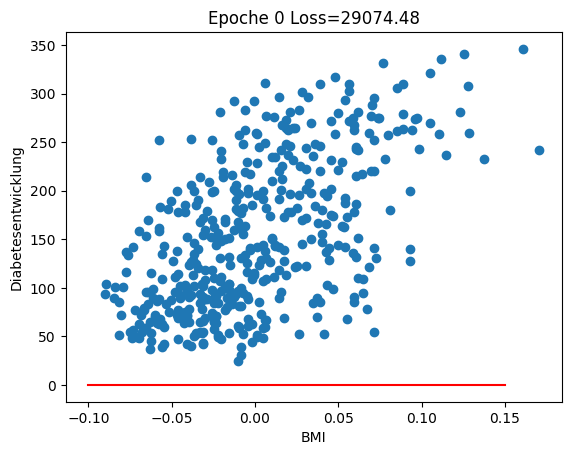

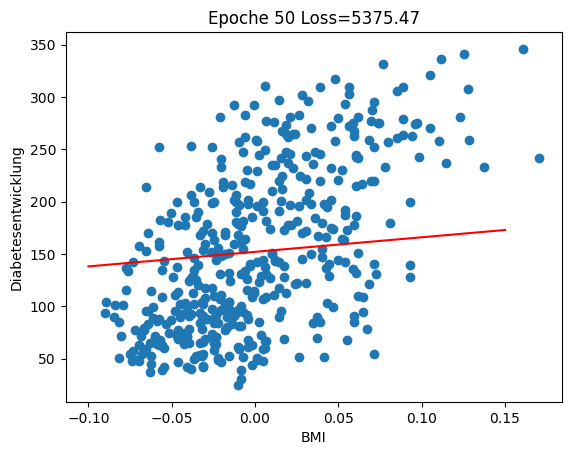

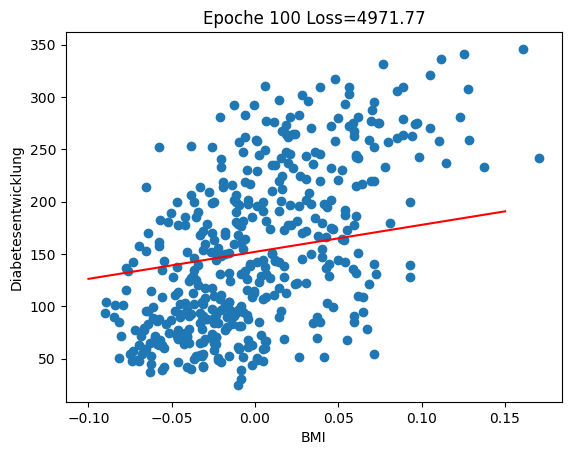

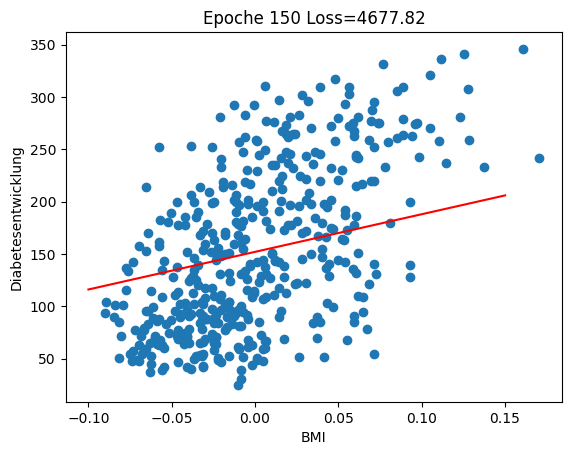

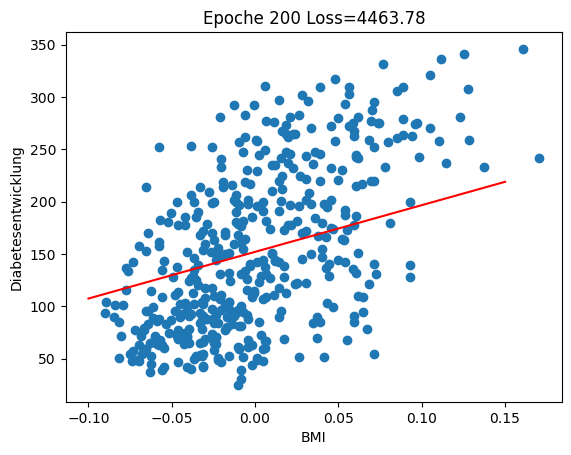

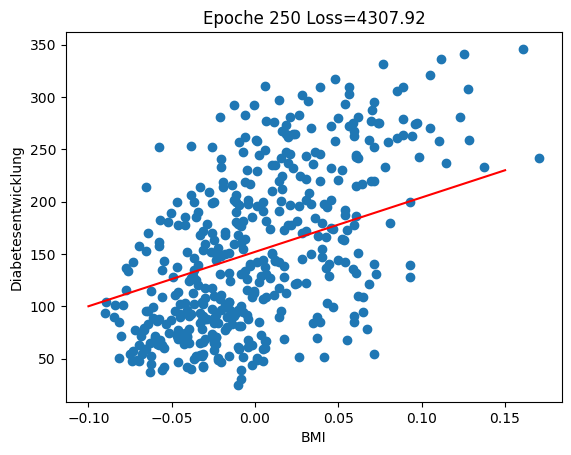

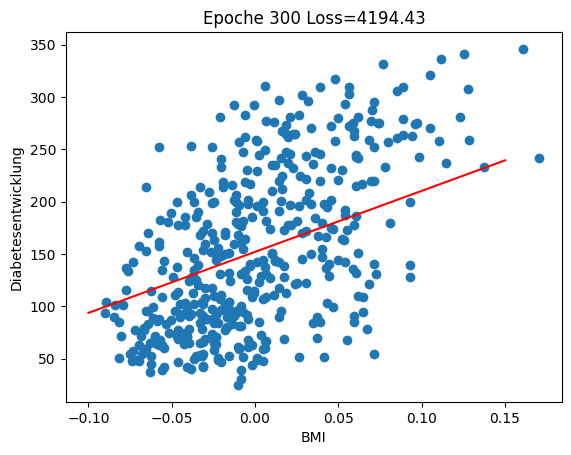

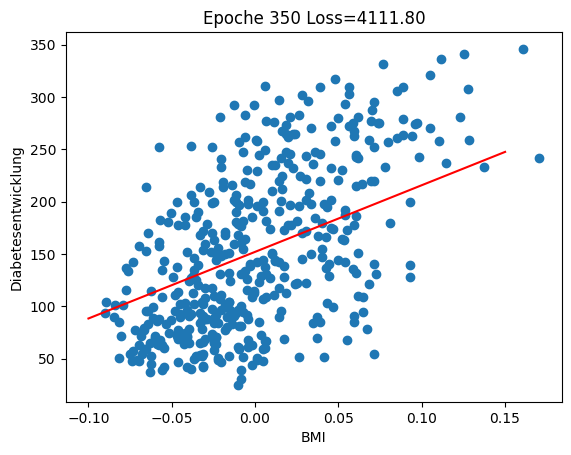

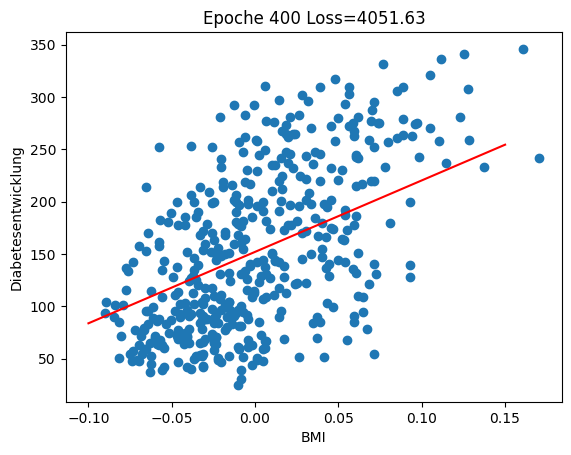

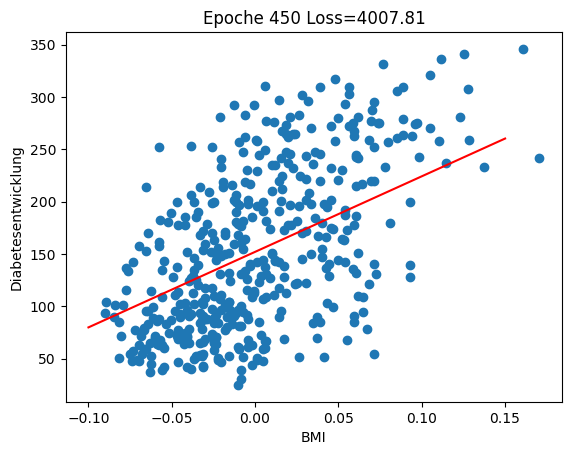

In [20]:
for i in range(0, 500, 50):
    w1 = history[i][1]
    w0 = history[i][2]
    plot_scatter_regress(w1, w0, f'Epoche {i} Loss={history[i][0]:.2f}')

In [21]:
X_train = bmi.to_numpy()
X_train = X_train.reshape(-1, 1)
X_train[:3]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121]])

In [23]:
y_train = diabetes.to_numpy()
y_train[:3]

array([151.,  75., 141.])

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.predict([[0.1]])

array([247.0770102])